<a href="https://colab.research.google.com/github/vn012/Cenario-CP/blob/main/CDAM_Aula07_Pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciência de Dados e Aprendizado de Máquina

# Aula 7 - Classificador Bayesiano

Nome Completo: Vinicius Santos de Sousa

RGM: 23505699

Data: 30/09/2023

## Parte 1 - Distribuição Gaussiana

### Gerando variaveis com distribuição aleatória

In [ ]:
import numpy as np
mu, sigma = 0, 0.1 # Média e Desvio Padrão
n = 500            # qtd de amostras
s = np.random.normal(mu,sigma,n)

variancia = $\sigma^2$

desvio padrão = $\sqrt(\sigma^2) = \sigma$

In [ ]:
import matplotlib.pyplot as plt
plt.plot(s);

In [ ]:
plt.hist(s,bins=30);
plt.title("Histograma")

### Equação para distribuição gaussiana

$$ P(x) = \frac{1}{{\sigma \sqrt {2\pi }}}e^{-(x-\mu)^2 /2σ^2}  $$

In [ ]:
plt.hist(s,bins=30, density=True);
plt.title("Histograma")

x = np.linspace(-0.3,0.3,50);
gaussiana = 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) ); # Equação para distribuição gaussiana
plt.plot(x,gaussiana,linewidth=2, color='r')

### Estimando média e variância

In [ ]:
np.var(s) # Variância
np.mean(s) # Média
np.sqrt(np.var(s)) # Devio padrão

### Distribuição Gaussiana Multinomial (mais dimesões)

In [ ]:
mu = (1, 2)            # Média em cada eixo
# cov = [[1, 0], [0, 1]] # Matriz de Correlação
cov = np.array(([1,0.9],[0.9,1]))
x = np.random.multivariate_normal(mu, cov, 1000)
# x.shape

plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
plt.axis('equal')

Visualização em 3D

In [ ]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])
sigma = np.array([.3, .3])
cov = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=cov)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z)

Para distribuições gaussianas multinomiais, é necessário definir as matrizes de covariância (ou correlação) e os vetores de média da distribuição.

$$
R = \begin{bmatrix} 1 & 0 \\ 0 & 1  \end{bmatrix},
\mu = \begin{bmatrix} 1 \\ 2 \end{bmatrix},
$$

Correlação: https://en.wikipedia.org/wiki/Correlation

Vejamos o que acontece quando vairamos a correlação

In [ ]:
mu = np.array([0.0, 0.0])

# cov = np.array(([1,0],[0,1]))
# cov = np.array(([1,-0.9],[-0.9,1]))
# cov = np.array(([1,-0.5],[-0.5,1]))
# cov = np.array(([1,-0.25],[-0.25,1]))
cov = np.array(([1,0.9],[0.9,1]))
# cov = np.array(([1,0.5],[0.5,1]))
# cov = np.array(([1,0.25],[0.25,1]))

print(cov)
z = multivariate_normal.pdf(xy, mean=mu, cov=cov)
z = z.reshape(x.shape)

fig = plt.figure()
ax = plt.axes()
contours = ax.contour(x,y,z, 50)
fig.colorbar(contours, shrink=.7, aspect=10)
ax.grid(True)
ax.axis('equal')

Exemplo: Gerando dados para pratica com classificador

In [ ]:
# Dados Classe 1
mu1 = np.array([2.0, -1.0])
cov1 = np.array(([1,0.5],[0.5,1]))

# Dados Classe 2
mu2 = np.array([-1.0, 2.0])
cov2 = np.array(([1,0.5],[0.5,1]))

x1 = np.random.multivariate_normal(mu1, cov1, 1000)
x2 = np.random.multivariate_normal(mu2, cov2, 1000)
# x.shape

plt.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
plt.scatter(x2[:, 0], x2[:, 1], alpha=0.5)
plt.axis('equal')

## Exercícios

1. Gere n = 100 amostras de uma variável aleatória $s$ de uma distribuição gaussiana, com média nula e variância unitária, e as armazene em um vetor

In [1]:
import numpy as np

# Numero de amostras
n = 100

amostras = np.random.randn(n)
# Agora, 'amostras' é um vetor de 100 amostras da distribuição gaussiana desejada
print(amostras)


[ 0.15022091 -1.59754558  0.22118901  0.89866109  0.94506354  1.13078635
 -0.20324318  0.08335603  0.83008987 -0.87181396  0.83113624  0.37021291
  1.45979284  1.09218079 -1.93715408 -1.26545208  0.40467866 -0.70616372
 -0.72977954 -0.31174591  0.90675424 -1.1240439   1.58531796  2.26593939
  1.37740725  0.16430813 -0.69879433  0.34993027 -0.14714741  0.6228367
 -2.05101536  0.32012325  0.61642673 -0.55288721  1.69624769  0.19112858
  0.80680934 -0.35849758  0.16753889  0.55294514 -1.67067205  1.63044304
  0.35875177  0.21360957 -0.60075939 -0.56218558 -0.03974989  0.70660541
  0.02474801  0.91811306 -0.45405205  0.20844672 -1.81797179 -0.33532579
  1.19040586  0.00905473 -0.58013967 -0.40381037  1.31062092 -0.82536628
 -0.45194841  1.03378222  0.40027879 -0.90646406  0.31391217 -1.161035
 -0.77548426 -0.03343496 -2.20205147 -0.42215517  0.79039097  1.00750962
  0.70976149  0.96791227 -0.62917238  0.31470517  2.14890624  2.34470728
  0.14011943  0.56612889 -1.02367785 -0.2015689   0.92

2. A partir do vetor obtido, estime:
*   O valor médio de $s$
*   A variância de $s$

In [4]:
# Calculando o valor médio (média) das amostras
media_amostras = np.mean(amostras)
print("Valor Médio de amostras:", media_amostras)

# Calculando a variância das amostras
variancia_amostras = np.var(amostras)
print("Variância de amostras:", variancia_amostras)

Valor Médio de amostras: 0.09072290807118896
Variância de amostras: 0.9922705483202751


3. Repita o procedimento pelo menos 10 vezes utilizando um laço `for` (correspondem a 10 realizações do mesmo processo aleatório), armazenando os valores estimados para a média e variância em cada uma das realizações e comente os resultados obtidos.

In [5]:
# INSIRA O CÓDIGO AQUI


num_realizacoes = 10

# Listas para armazenar as médias e variâncias
medias = []
variancias = []

for _ in range(num_realizacoes):
    # vetor  de amostras com 100 amostras da distribuição gaussiana desejada
    amostras = np.random.randn(n)

    # Calculando o valor médio (média) das amostras e adicionando a lista de médias
    media_amostras = np.mean(amostras)
    medias.append(media_amostras)

    # Calculando a variancia das amostras e adicionando a lista de variâncias
    variancia_amostras = np.var(amostras)
    variancias.append(variancia_amostras)

# Imprimir as médias e variâncias de cada realização
for i in range(num_realizacoes):
    print(f"Realização {i + 1}:")
    print("Média:", medias[i])
    print("Variância:", variancias[i])
    print()

# Comentários sobre os resultados obtidos
media_media = np.mean(medias)
variancia_media = np.mean(variancias)

print(f"Média das médias: {media_media}")
print(f"Média das variâncias: {variancia_media}")

Realização 1:
Média: 0.11698622492102839
Variância: 0.9106540539388536

Realização 2:
Média: 0.0963118418680628
Variância: 0.7869936619420271

Realização 3:
Média: 0.16029886424734952
Variância: 1.2834320885640675

Realização 4:
Média: 0.022096386791078206
Variância: 1.2059115167313244

Realização 5:
Média: -0.09791960914023458
Variância: 1.0820077180274275

Realização 6:
Média: 0.14790603566180713
Variância: 0.8341553748405574

Realização 7:
Média: -0.055717699620483445
Variância: 0.7648548217262902

Realização 8:
Média: -0.040269860564731114
Variância: 1.0025956204525068

Realização 9:
Média: 0.009542733542609328
Variância: 0.9258129307855483

Realização 10:
Média: -0.08528515748847608
Variância: 1.0321923172319312

Média das médias: 0.027394976021801014
Média das variâncias: 0.9828610104240534


4. Aumente agora o número de amostras n do sinal e verifique o que ocorre com as estimativas. Apresente em um gráfico a estimativa da média em função do número de amostras n (n=100, n=200, n=500, n=1000) considerando que para cada valor de n existirão 10 médias estimadas. Comente os resultados.

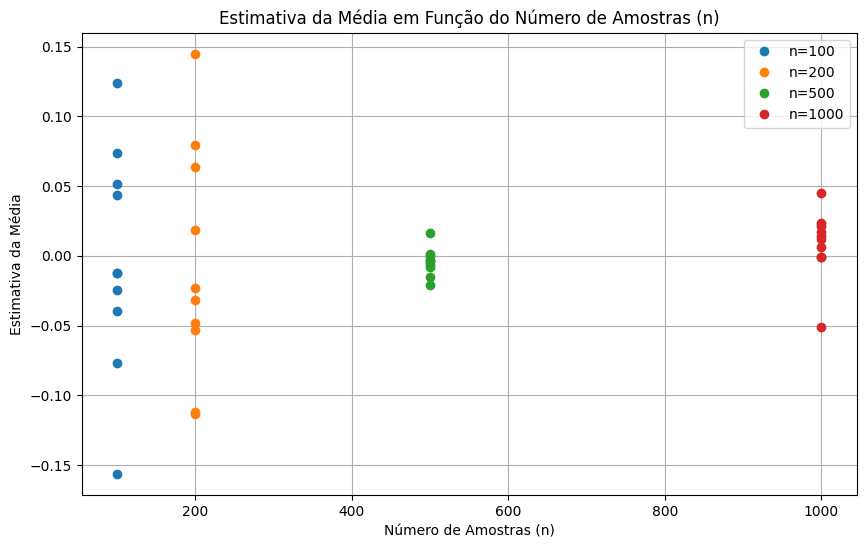

In [6]:
# INSIRA O CÓDIGO AQUI

import matplotlib.pyplot as plt

# Valores de n para teste
valores_n = [100, 200, 500, 1000]

# Numero de realizações para cada valor de n
num_realizacoes = 10

# Lista para armazenar as médias de cada realização para cada valor de n
medias_por_n = []

for n in valores_n:
    medias_realizacao = []
    for _ in range(num_realizacoes):
        # Gerando o vetor 'amostras' com 'n' amostras da distribuição gaussiana
        amostras = np.random.randn(n)

        # Calculando o valor médio (média) das amostras e adicionando à lista de médias
        media_amostras = np.mean(amostras)
        medias_realizacao.append(media_amostras)

    medias_por_n.append(medias_realizacao)

# Plotando as estimativas da média em função de n
plt.figure(figsize=(10, 6))
for i, n in enumerate(valores_n):
    plt.plot([n] * num_realizacoes, medias_por_n[i], 'o', label=f'n={n}')

plt.xlabel('Número de Amostras (n)')
plt.ylabel('Estimativa da Média')
plt.legend()
plt.grid()
plt.title('Estimativa da Média em Função do Número de Amostras (n)')
plt.show()

5. Para cada uma das distribuições aleatórias mostradas no notebook da **Aula 06**, utilize o calculo da média e variância para aproximar cada uma delas de uma distribuição gaussiana e verifique o resultado plotando a curva gaussiana sobre o gráfico

In [ ]:
# INSIRA O CÓDIGO AQUI

6. Agora, some em um uma única variável os vetores/dados das distribuições geradas e aproxime o resultado final de uma distribuição gaussiana, novamente mostrando o resultado através de um gráfico. O que acontece? Como você explica este resultado?

In [ ]:
# INSIRA O CÓDIGO AQUI

## **Parte 3 - Classificação** - Naive Bayes

Considere o seguinte problema de classificação unidimensional com
duas classes: Um estudo em uma espécie animal observa que a concentração de uma substância no sangue pode ser importante para o seu diagnóstico. De acordo com os resultados obtidos, a concentração da substância 𝑥, possui distribuição gaussiana tanto na população saudável ($𝜔_1$) quanto na população doente ($𝜔_2$), sendo que a distribuição da população saudável possui média ($𝜇_1$)=9mg/dl enquanto a da população doente ($𝜇_2$)=12mg/dl. Ambas as distribuições condicionais possuem a mesmo desvio padrão 𝜎=2mg/dl.

1. Plote em um único gráfico ambas as distribuições gaussianas em função do atributo $x$.

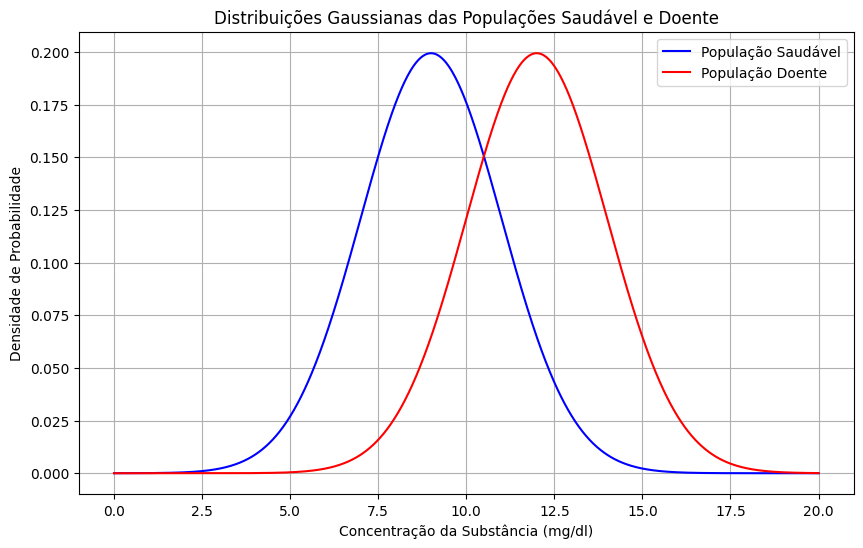

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros das distribuições
mu1 = 9  # Média da população saudável
mu2 = 12  # Média da população doente
sigma = 2  # Desvio padrão comum a ambas as populações

# Faixa de valores de x
x = np.linspace(0, 20, 1000)

# Calculo das PDFs (funções de densidade de probabilidade) para ambas populações
pdf1 = norm.pdf(x, mu1, sigma)
pdf2 = norm.pdf(x, mu2, sigma)

# Plote das distribuições gaussianas
plt.figure(figsize=(10, 6))
plt.plot(x, pdf1, label='População Saudável', color='blue')
plt.plot(x, pdf2, label='População Doente', color='red')
plt.xlabel('Concentração da Substância (mg/dl)')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuições Gaussianas das Populações Saudável e Doente')
plt.legend()
plt.grid(True)
plt.show()


2. Utilizando a função np.random.normal gere 500 asmostras para cada uma das classes. Mostre o resultado num histograma.

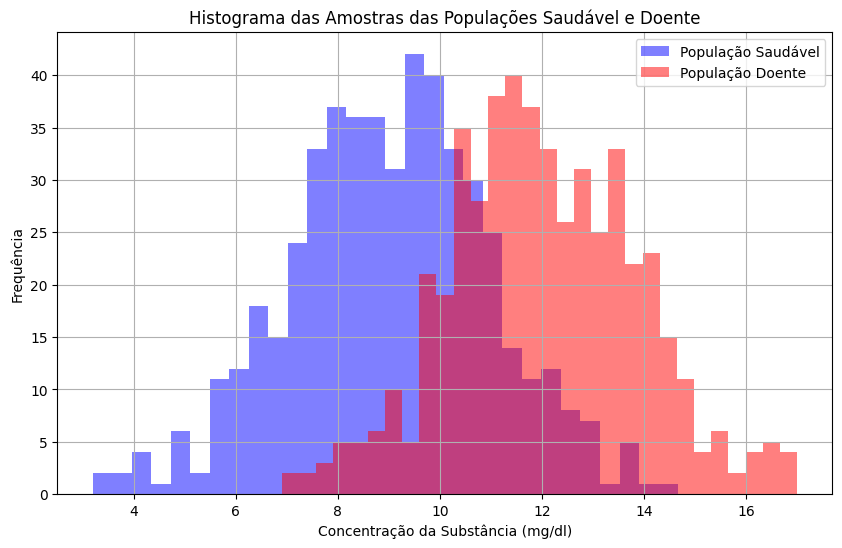

In [8]:
# Parâmetros das distribuições
sample_size = 500  # Tamanho da amostra para cada classe

# amostras aleatórias para ambas as classes
samples_class1 = np.random.normal(mu1, sigma, sample_size)
samples_class2 = np.random.normal(mu2, sigma, sample_size)

# Plote os histogramas
plt.figure(figsize=(10, 6))
plt.hist(samples_class1, bins=30, alpha=0.5, label='População Saudável', color='blue')
plt.hist(samples_class2, bins=30, alpha=0.5, label='População Doente', color='red')
plt.xlabel('Concentração da Substância (mg/dl)')
plt.ylabel('Frequência')
plt.title('Histograma das Amostras das Populações Saudável e Doente')
plt.legend()
plt.grid(True)
plt.show()

3. Crie um vetor X contendo todas as amostras geradas (concatenação), e também um vetor y contendo o valor de 0 ou 1 para os rótulos das classes correspondentes (classe 1 = 0 e classe 2 = 1).

In [9]:
# Crie o vetor X concatenando as amostras de ambas as classes
X = np.concatenate((samples_class1, samples_class2))

# Crie o vetor y com os rótulos das classes correspondentes
y = np.concatenate((np.zeros(sample_size), np.ones(sample_size)))

# Verifique as dimensões de X e y
print("Dimensão de X:", X.shape)
print("Dimensão de y:", y.shape)

Dimensão de X: (1000,)
Dimensão de y: (1000,)


4. Baseando-se nos códigos desenvolvidos na Aula 06, separa os dados em treinamento e teste (70/30).

In [10]:
### Código Aqui ###

from sklearn.model_selection import train_test_split

# Separar os dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar as dimensões dos conjuntos de treinamento e teste
print("Dimensões do conjunto de treinamento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nDimensões do conjunto de teste:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Dimensões do conjunto de treinamento:
X_train: (700,)
y_train: (700,)

Dimensões do conjunto de teste:
X_test: (300,)
y_test: (300,)


5. Importe o classificador GaussianNB (Naive Bayes Gaussiano) da biblioteca sklearn.naive_bayes e aplique nos dados gerados.

  Dica:  Utilize o método X.reshape(-1,1), nos vetores X_train da função **fit** para garantir que o vetor resultante possui as dimensões corretas

In [ ]:
### Código Aqui ###

6. Avalie os resultados no conjunto de testes utilizando o método .predict() do classificador.

  Dica:  Utilize o método X.reshape(-1,1), nos vetores X_test da função **predict** para garantir que o vetor resultante possui as dimensões corretas

In [ ]:
### Código Aqui ###

7. Calcule a acurácia do classificador através da função accuracy_score da biblioteca sklearn.metrics.

In [ ]:
### Código Aqui ###

8. Apresente a matriz de confusão do classificador através da função confusion_matrix da biblioteca sklearn.metrics

In [ ]:
### Código Aqui ###

9. A partir da matriz de confusão, obtenha os valores de TP, TF, FP e FN, armazene-os em variáveis correspondentes e calcule a partir deles as seguintes métricas:
Acurácia, Taxa de Erro, Sensibilidade, Especificidade, Precisão, Recall e F1-Score.


In [ ]:
### Código Aqui ###

## Referências

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Distribuição Normal](https://en.wikipedia.org/wiki/Normal_distribution)

[Correlação](https://en.wikipedia.org/wiki/Correlation)

[Naive Bayes - Scikit Learn](https://scikit-learn.org/stable/modules/naive_bayes.html)